In [ ]:
import pandas as pd
df=pd.read_csv("dataset.csv")
df.head()

,customer_id,age,region,tenure_months,current_plan,monthly_data_gb,call_minutes,overage_charges,previous_upgrades,target_upgrade
0,CUST_000001,45,Suburban,110,Basic_2GB,1.40,525,0.00,1,0
1,CUST_000002,38,Rural,31,Standard_5GB,5.04,525,0.00,0,0
2,CUST_000003,47,Urban,24,Standard_5GB,2.60,525,0.00,0,1
3,CUST_000004,58,Rural,50,Basic_2GB,0.50,525,0.00,0,0
4,CUST_000005,37,Suburban,11,Standard_5GB,5.13,525,2.81,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        25000 non-null  object 
 1   age                25000 non-null  int64  
 2   region             25000 non-null  object 
 3   tenure_months      25000 non-null  int64  
 4   current_plan       25000 non-null  object 
 5   monthly_data_gb    25000 non-null  float64
 6   call_minutes       25000 non-null  int64  
 7   overage_charges    25000 non-null  float64
 8   previous_upgrades  25000 non-null  int64  
 9   target_upgrade     25000 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 1.9+ MB


In [ ]:
df["current_plan"].str.split("_")[0][1]

'2GB'

In [ ]:
#Converting the current plan into a numeric column
df["current_plan_new"]=df["current_plan"].str.split("_")[0][1]

In [ ]:
df["current_plan_new"]

,current_plan_new
0,2GB
1,2GB
2,2GB
3,2GB
4,2GB
...,...
24995,2GB
24996,2GB
24997,2GB
24998,2GB


In [ ]:
df["current_plan_new"]=df["current_plan_new"].str.replace("GB","")

In [ ]:
df["current_plan_new"]

,current_plan_new
0,2
1,2
2,2
3,2
4,2
...,...
24995,2
24996,2
24997,2
24998,2


In [ ]:
df["current_plan"]=df["current_plan_new"]
df["current_plan"]=df["current_plan"].astype(int)

In [ ]:
df.drop(columns=["current_plan_new"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        25000 non-null  object 
 1   age                25000 non-null  int64  
 2   region             25000 non-null  object 
 3   tenure_months      25000 non-null  int64  
 4   current_plan       25000 non-null  int64  
 5   monthly_data_gb    25000 non-null  float64
 6   call_minutes       25000 non-null  int64  
 7   overage_charges    25000 non-null  float64
 8   previous_upgrades  25000 non-null  int64  
 9   target_upgrade     25000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.9+ MB


In [ ]:
#Making customer_id as the index
df.index=df["customer_id"]
df.drop(columns=["customer_id"],inplace=True)

In [ ]:
df.head()

,age,region,tenure_months,current_plan,monthly_data_gb,call_minutes,overage_charges,previous_upgrades,target_upgrade
customer_id,,,,,,,,,
CUST_000001,45,Suburban,110,2,1.40,525,0.00,1,0
CUST_000002,38,Rural,31,2,5.04,525,0.00,0,0
CUST_000003,47,Urban,24,2,2.60,525,0.00,0,1
CUST_000004,58,Rural,50,2,0.50,525,0.00,0,0
CUST_000005,37,Suburban,11,2,5.13,525,2.81,1,0


In [ ]:
#Train_test_split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:8],df.iloc[:,-1],test_size=0.2,random_state=42)

X_train.shape

(20000, 8)

In [ ]:
X_train.head()

,age,region,tenure_months,current_plan,monthly_data_gb,call_minutes,overage_charges,previous_upgrades
customer_id,,,,,,,,
CUST_023312,49,Suburban,111,2,0.72,525,3.33,1
CUST_023624,46,Rural,22,2,1.21,525,1.95,0
CUST_001021,46,Urban,16,2,6.83,525,19.78,1
CUST_012646,59,Urban,24,2,0.93,525,0.00,0
CUST_001534,38,Urban,13,2,4.45,525,0.00,1


In [ ]:
print(df.columns.get_loc('age'))

0


In [ ]:
#Label encoding X_train and X_test
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X_train["region"]=le.fit_transform(X_train["region"])
X_test["region"]=le.transform(X_test["region"])

In [ ]:
X_test

,age,region,tenure_months,current_plan,monthly_data_gb,call_minutes,overage_charges,previous_upgrades
customer_id,,,,,,,,
CUST_006869,33,2,11,2,8.03,189,35.00,0
CUST_024017,35,2,86,2,8.85,525,44.31,0
CUST_009669,28,0,49,2,4.16,189,3.94,0
CUST_013641,36,1,80,2,1.95,525,0.06,0
CUST_014019,35,2,7,2,4.90,525,0.00,1
...,...,...,...,...,...,...,...,...
CUST_008671,53,1,10,2,1.50,525,0.00,1
CUST_011840,41,2,111,2,6.12,525,12.94,0
CUST_004014,42,1,25,2,11.38,525,17.37,0


In [ ]:
y_train.shape

(20000,)

In [ ]:
#Training the model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Finding the prediction and the accuracy_score
y_pred=rf.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.704

In [ ]:
#Calculating the feature importance of all the features
rf.feature_importances_

array([0.15880406, 0.04198251, 0.20134847, 0.        , 0.26429705,
       0.01855385, 0.27973765, 0.0352764 ])

In [ ]:
#If the data has high cardinality i.e more distinct values

#Thats still a question in my mind, how to do

In [ ]:
df.head()

,age,region,tenure_months,current_plan,monthly_data_gb,call_minutes,overage_charges,previous_upgrades,target_upgrade
customer_id,,,,,,,,,
CUST_000001,45,Suburban,110,2,1.40,525,0.00,1,0
CUST_000002,38,Rural,31,2,5.04,525,0.00,0,0
CUST_000003,47,Urban,24,2,2.60,525,0.00,0,1
CUST_000004,58,Rural,50,2,0.50,525,0.00,0,0
CUST_000005,37,Suburban,11,2,5.13,525,2.81,1,0


In [ ]:
df["target_upgrade"].value_counts()

#It is a balanced dataset and accuracy is a valid metric here

,count
target_upgrade,
0,13686
1,11314


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_proba = rf.predict_proba(X_test)[:, 1]   # get probabilities for class 1

auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", auc)

ROC-AUC Score: 0.7604696306201119


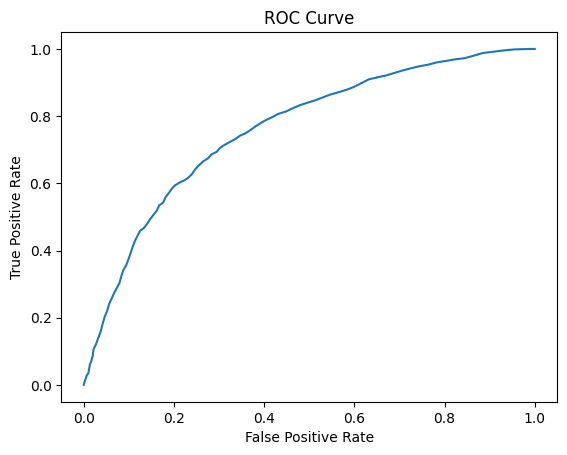

In [ ]:
# Plotting the ROC-AUC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Text(0.5, 0, 'Importance')

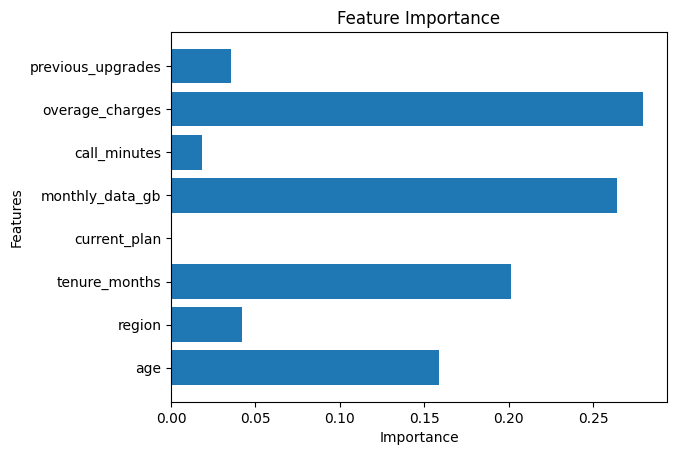

In [ ]:
#Plotting the feature importance chart
import matplotlib.pyplot as plt

plt.barh(X_train.columns,rf.feature_importances_)
plt.title("Feature Importance")
plt.ylabel("Features")
plt.xlabel("Importance")

In [ ]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test,y_pred)
cm

array([[2060,  704],
       [ 776, 1460]])

In [ ]:
#Here 776 is the False Positives
# It means that actually the customer wanted to buy the recharge again but we predicted that He wont buy. This is quite harmful and we have to reduce this number as much as we possibly can.